#  <h1>Chronic Condition Cost Project </h1>
<h2>Natalie Jackson </h2>
<h4> BMI 6018 </h4>
<h3>Background:</h3>  This project was created to facilitate the analysis of which chronic conditions patient groupings in a Medicaid care plan had the highest claims costs.  Further analysis will examine which chronic condition attributes drive cost: prescription drug cost, medical cost, ED visits, Admissions, among others.<br>
<h3>Project Goals:</h3>
1.	Use Python to identify chronic condition groupings with the highest claim costs.
2.	Import a csv file which lists Chronic Conditions groupings and their attributes.
3.	Define a parent class and a child class that inherits from the parent class using a str method.
4.	Create a matplotlib bar chart.


In [1]:
import csv
import  matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wg
from IPython.display import display


In [6]:
class MedicaidPatients(object):
    
    """A class to model Medicaid Patients."""
    
    def __init__(self, age_group, ed_visits, total_cost):
        self.age_group = age_group
        self.ed_visits = ed_visits
        self.total_cost = total_cost
        """Attributes:
               attr1 (str): age_group
               attr2 (str): ed_visits
               attr3 (str): total_cost."""


        def __str__(self):
                return "age_group "+self.age_group+", ed_visits "+str(self.ed_visits)+", total_cost"+ str(self.total_cost)
        """Get the individual characteristincs in a string."""
    
class ChronCondPatients(MedicaidPatients):
    
    """ChronCondPatients represents a medicaid patient chronic condition group."""
    
    def __init__(self, age_group, ed_visits, total_cost, chronic_condition):
        super(ChronCondPatients, self).__init__(age_group, ed_visits, total_cost)
        self.chronic_condition = chronic_condition
        
    def getcost(self):
        return self.total_cost
        """Return the total cost."""
    
    def getcondition(self):
        return self.chronic_condition
        """Return chronic conditon group names."""
    
    def __str__(self):
        return super(ChronCondPatients, self).__str__()+" chronic condition "+self.chronic_condition
        """Use super method to get access to the inherited methods from the parent class
                and return a string."""   

    

In [8]:
ChronicCondition = wg.Text(value='ChronicCondition')
TotalCost = wg.IntSlider(description='TotalCost')
display(ChronicCondition, TotalCost)

Text(value='ChronicCondition')

IntSlider(value=0, description='TotalCost')

In [15]:
print('Total Cost of ' + ChronicCondition.value + ' is the sum of ' + 'medical cost and drug cost')

Total Cost of ChronicCondition is the sum of medical cost and drug cost


<h1>Chronic Condition Data </h1>
<h2> A csv file with chronic condition groupings and their attributes.

In [15]:
csvfile = open("ChronicCond.csv", 'r', encoding='iso-8859-1')
dialect = csv.Sniffer().sniff(csvfile.read(1024))
csvfile.seek(0)
DATAREADER = csv.reader(csvfile, dialect)

"""Open and read the csv file ChronicCond."""

'Open and read the csv file ChronicCond.'

In [16]:
PATIENT_GROUP_LIST=[]

"""Return an empty list called patient_group and use a for loop to iterate over the elements
    in the csv file."""  

rownum = 0
for row in DATAREADER:
    if rownum == 0:
        rownum += 1
        continue
    #print (row)
    
    PATIENT_GROUP_LIST.append(ChronCondPatients("Age Group", row[8], float(row[9][1:].replace(',',"")), row[0]))
    """Prints the patient_group list with appended row 8, row 9 as a float, and replace 
    the comma, and row 0."""   

csvfile.close()
#close the file

In [17]:
print (PATIENT_GROUP_LIST)

[<__main__.ChronCondPatients object at 0x7fba8f185438>, <__main__.ChronCondPatients object at 0x7fba8f188048>, <__main__.ChronCondPatients object at 0x7fba8f185470>, <__main__.ChronCondPatients object at 0x7fba8f1855f8>, <__main__.ChronCondPatients object at 0x7fba8f1856a0>, <__main__.ChronCondPatients object at 0x7fba8f185518>, <__main__.ChronCondPatients object at 0x7fba8f185550>, <__main__.ChronCondPatients object at 0x7fba8f185780>, <__main__.ChronCondPatients object at 0x7fba8f185710>, <__main__.ChronCondPatients object at 0x7fba8f185630>, <__main__.ChronCondPatients object at 0x7fba8f1855c0>, <__main__.ChronCondPatients object at 0x7fba8f1856d8>, <__main__.ChronCondPatients object at 0x7fba8f185748>, <__main__.ChronCondPatients object at 0x7fba8f185828>, <__main__.ChronCondPatients object at 0x7fba8f185a20>, <__main__.ChronCondPatients object at 0x7fba8f185b38>, <__main__.ChronCondPatients object at 0x7fba8f1857b8>, <__main__.ChronCondPatients object at 0x7fba8f185860>, <__main__

In [13]:
LABELS = []
COSTLABEL = []

for condition in PATIENT_GROUP_LIST:
    if condition.getcost() > 200000.00:
        LABELS.append(condition.getcondition())
        COSTLABEL.append(int(condition.getcost()))
     

# Data Visualization


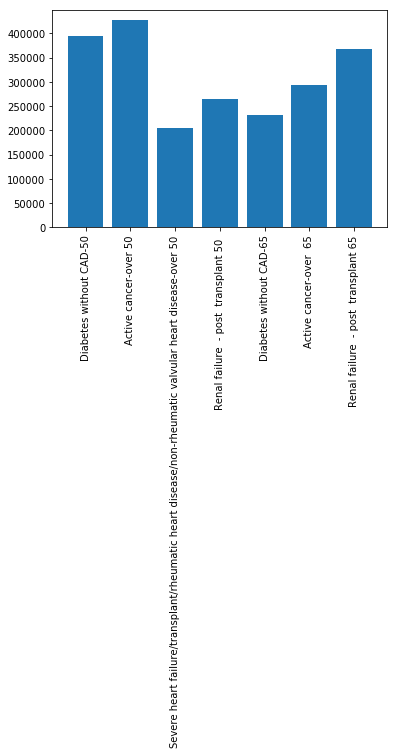

In [14]:

#pyp.bar(costlabel, height=[50,50,100], tick_label=labels)


X = np.arange(len(LABELS))

plt.bar(X, COSTLABEL)
plt.xticks(X, LABELS, rotation='vertical')
plt.show()